## We need to identify the digit in given images

### Importing essentials

In [1]:
import pandas as pd
import os
import warnings
os.chdir('/home/admin1/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')
warnings.filterwarnings("ignore")

# importing essentials from tensorflow library for CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

### Building Convolutional Neural Network model

In [2]:
# configuring model as sequential
classifier = Sequential()

# step 1 convolutional layer: to make build feature maps using feature detectors & removing linearity using relu
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# setp 2 maxpool layer: to build pooled feaure map to accomodate invariance in tilt/flip/orientation still catch feature
# reducing size with maxpooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# repeating steps 1 & 2 to make features more prominent for classification
classifier.add(Conv2D(64, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# step 3 flatteing: to get flattened long vector of these values to be passed as inputs to neural network 
classifier.add(Flatten())

classifier.add(Dropout(0.3))

# Step 4 Building neural network: learning patterns in given inputs using dense ntwork
# input to neural network
classifier.add(Dense(32, activation='relu'))

# output layer
classifier.add(Dense(10, activation='sigmoid'))

# setting parameters such as optmizing algo, loss fn, evaluation formula for classifier model  
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Creating dataframe for image address & class label

In [3]:
dataset = pd.read_csv('Identify-numbers/train.csv')

for index in range(len(dataset)):
    dataset['filename'][index] = 'Identify-numbers/train/' + dataset['filename'][index]  

dataset = dataset.astype(str)

#### Splitting dataset into train set & test set

In [4]:
train_dataset = dataset[:35000]
test_dataset = dataset[35000:]
test_dataset = test_dataset.reset_index()

### Image Preprocessing

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# converting image to 3D matrices & scaling as well
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2)

# defining necessary scaling for test set images same as train set images
test_datagen = ImageDataGenerator(rescale=1./255)

# loading images into train set from directory & defining iamge pixel-size 
training_set = train_datagen.flow_from_dataframe(dataframe=train_dataset,
                                                x_col='filename',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='categorical',
                                                y_col='label')

# loading images into train set from directory & defining iamge pixel-size 
test_set = test_datagen.flow_from_dataframe(dataframe=test_dataset,
                                                x_col='filename',
                                                target_size=(64, 64),
                                                batch_size=1,
                                                class_mode='categorical',
                                                y_col='label')

Found 35000 validated image filenames belonging to 10 classes.
Found 14000 validated image filenames belonging to 10 classes.


#### Creating tensorboard object for visualisation

In [6]:
import time
name = f'classify-numbers-cnn {time.time()}'
tensorboard = TensorBoard(log_dir=f'logs/{name}')

### Fitting model

In [7]:
epochs = 10
# fitting ann model to train set
history = classifier.fit(training_set, epochs=epochs, validation_data=test_set, callbacks=[tensorboard])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1094 steps, validate for 14000 steps
Epoch 1/10
1094/1094 [==============================] - 59s 54ms/step - loss: 0.3827 - accuracy: 0.8777 - val_loss: 0.1427 - val_accuracy: 0.9565
Epoch 2/10
1094/1094 [==============================] - 58s 53ms/step - loss: 0.1557 - accuracy: 0.9527 - val_loss: 0.0933 - val_accuracy: 0.9719
Epoch 3/10
1094/1094 [==============================] - 58s 53ms/step - loss: 0.1238 - accuracy: 0.9619 - val_loss: 0.0803 - val_accuracy: 0.9750
Epoch 4/10
1094/1094 [==============================] - 59s 54ms/step - loss: 0.1091 - accuracy: 0.9661 - val_loss: 0.0828 - val_accuracy: 0.9736
Epoch 5/10
1094/1094 [==============================] - 56s 51ms/step - loss: 0.1011 - accuracy: 0.9679 - val_loss: 0.0727 - val_accuracy: 0.9788
Epoch 6/10
1094/1094 [==============================] - 55s 50ms/step - loss: 0.0860 - accuracy: 0.9726 - val_loss: 0.0683 - val_accuracy: 0.9792
Epoch 7/10
1094/1094 [=====

### Plotting evaluation on train set & test set

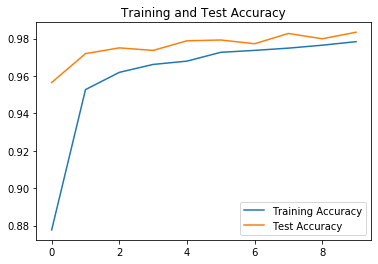

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')
plt.show()

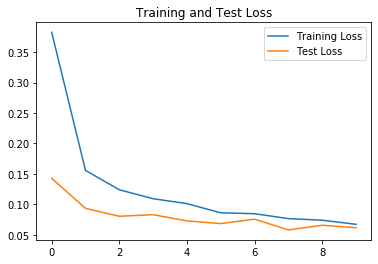

In [10]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

### Manually checking predictions of images

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt 

def prediction(index):
    img_path = test_dataset['filename'][index]
    img = image.load_img(img_path, target_size=(64,64,1))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    print(f"Actual digit in pic: {test_dataset['label'][index]}")
    print(f'Predicted value: {classifier.predict_classes(img)[0]}')

Actual digit in pic: 7
Predicted value: 7


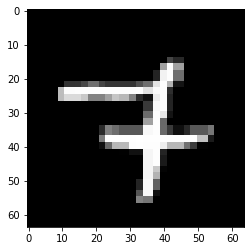

In [14]:
prediction(480)